First name : Wissem <br>
Family name : Amar <br>
Group : 2CS1 <br>

------------------------------------------

### Homework :
 Detecting and Eliminating Outliers in a Discrete Data Set by analyzing the percentiles.
<b>Definiton :  </b> “Percentiles are a way to describe the relative standing of a particular value within a dataset. When you talk about percentiles, you are essentially asking, "What percentage of the data falls below a certain value?" or "What value does a certain percentage of the data fall below?”


------------------------------------------

#### Step 01 : understanding percentiles technique. <br>
 Document percentiles techniques, and understand how to use it in handling data noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Step 02 : Generate synthetic data.

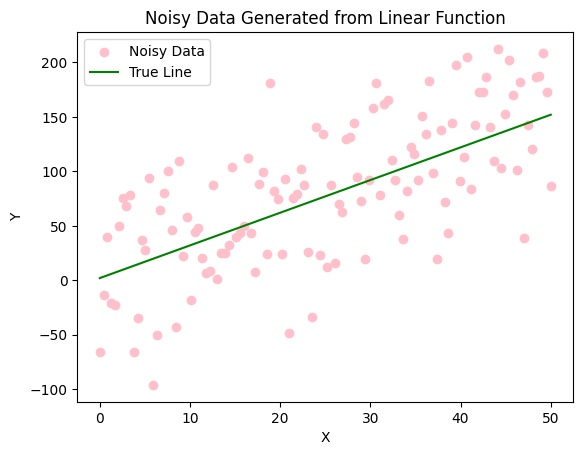

In [2]:
# Create a vector X of N data points.
N = 120
X = np.linspace(0, 50, N)
# Create the vector Y by defining the parameters A and B.
A = 3
B = 2
Y = A * X + B
# Generate the vector S of noise values.
S = np.random.normal(0, 50, N)
# Create the final data by summing up S and Y.
data = Y + S
# Plot the data using a scatter chart.
plt.scatter(X, data, color="pink", label="Noisy Data")
plt.plot(X, Y, color="green", label="True Line", linewidth=1.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Noisy Data Generated from Linear Function")
plt.legend()
plt.show()

In [3]:
# Note interpretations and conclusions.
"""
- The scatter plot visually shows how noise (dots that are realtively far from the green line) affects the original linear function.
- The green line represents the true underlying linear relationship without noise.
- This type of analysis is common in understanding the relationship between variables and assessing the effect of noise in real-world data.
"""

'\n- The scatter plot visually shows how noise (dots that are realtively far from the green line) affects the original linear function.\n- The green line represents the true underlying linear relationship without noise.\n- This type of analysis is common in understanding the relationship between variables and assessing the effect of noise in real-world data.\n'

#### Step 3: Calculate Quartiles and Interquartile Range (IQR)

In [4]:
# Calculate the first quartile (Q1) and the third quartile (Q3) of the data.
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
print(f"Q1 : {Q1} \nQ3 : {Q3}")

Q1 : 35.8749435985616 
Q3 : 131.93581318551182


In [5]:
# Calculate the interquartile range (IQR) using the formula: IQR = Q3 - Q1.
IQR = Q3 - Q1
print(f"The interquartile range : {IQR} ")

The interquartile range : 96.06086958695022 


#### Step 4: Identify Potential Outliers

In [6]:
# Identify potential outliers using the IQR method.
# Any data points that satisfy the next conditions can be considered a potential outlier:
# Data point that falls below Q1 - 1.5 * IQR
# Data point above Q3 + 1.5 * IQR.
low_edge = Q1 - 1.5 * IQR
high_edge = Q3 + 1.5 * IQR
# retrieve the outlier
potential_outliers = data[(data < low_edge) | (data > high_edge)]
print(potential_outliers)

[]


#### Step 5: Eliminate Outliers 

In [7]:
print(f"The shape of the whole data before : {data.size}")
cleaned_data = np.delete(data, np.where(np.isin(data, potential_outliers)))
print(f"The shape of the cleaned data after : {cleaned_data.size}")

The shape of the whole data before : 120
The shape of the cleaned data after : 120


#### Step 6: Visualize the Cleaned Data

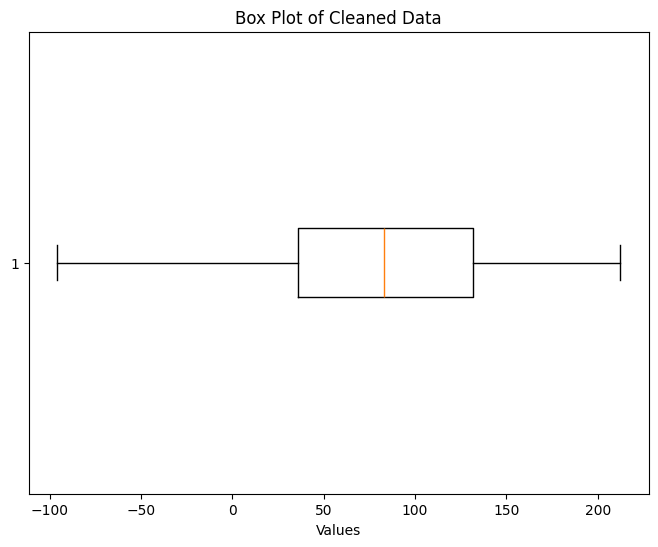

In [8]:
# Visualize the cleaned data using a box plot or histogram to see how the removal of outliers
# has affected the data distribution.

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data, vert=False)
# plt.boxplot (data, vert=False)
plt.title("Box Plot of Cleaned Data")
plt.xlabel("Values")
plt.show()

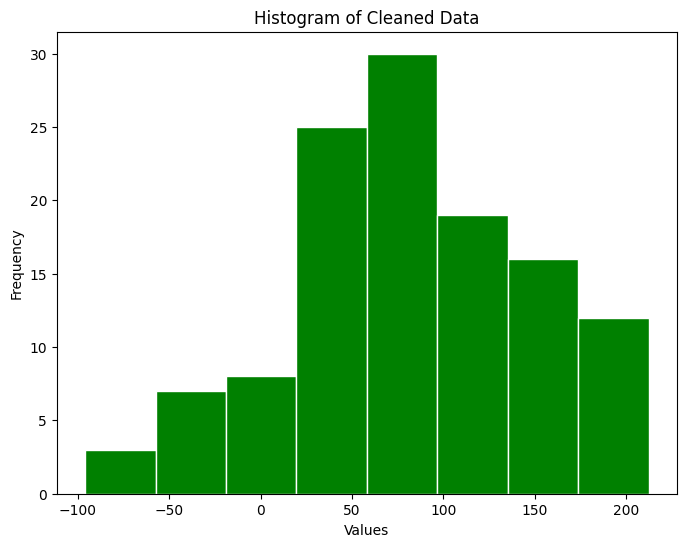

In [9]:
#  histogram
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data, bins="auto", color="green", edgecolor="white")
plt.title("Histogram of Cleaned Data")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

C:\Users\PC CABA DZ\AppData\Local\Temp\ipykernel_17712\3655518318.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, "k", color="black", linewidth=1.3)


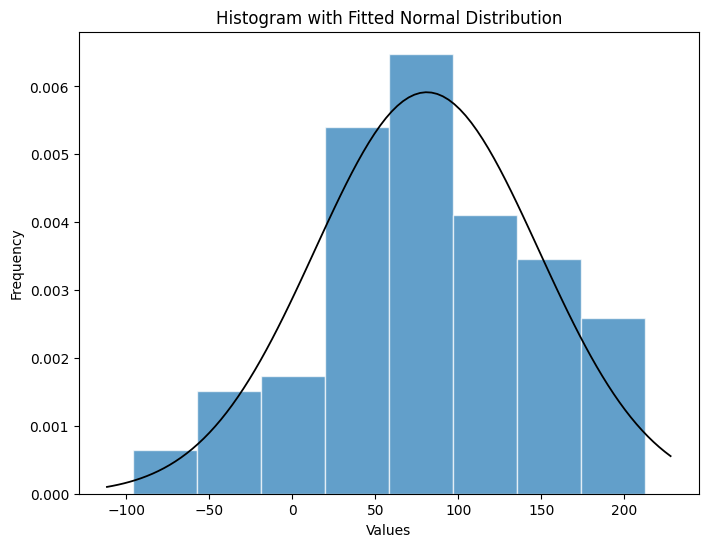

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(cleaned_data, bins="auto", edgecolor="white", density=True, alpha=0.7)

# Fit a normal distribution to the data
mu, std = norm.fit(cleaned_data)

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "k", color="black", linewidth=1.3)

# Add labels and title
plt.title("Histogram with Fitted Normal Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

#### Step 7: Compare the Original and Cleaned Data

In [11]:
# Reflect on how the removal of outliers affected the data distribution, mean, and overall insights.
print(
    f"Before : \n The mean : {np.mean(data)} \n The std : {np.std(data)} \n The median : {np.median(data)}"
)
print()
print(
    f"After : \n The mean : {np.mean(cleaned_data)} \n The std : {np.std(cleaned_data)} \n The median : {np.median(cleaned_data)}"
)

Before : 
 The mean : 81.05179484332727 
 The std : 67.44776906514267 
 The median : 82.90321943377087

After : 
 The mean : 81.05179484332727 
 The std : 67.44776906514267 
 The median : 82.90321943377087


#### Step 8: optional: data modeling

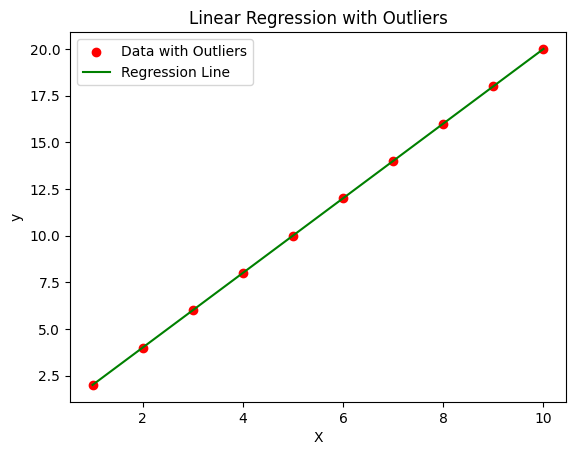

In [12]:
# Propose a simple data modeling technique, and examine it with your data in both cases:
# with outliers, and after outliers’ removal.

from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
model_with_outliers = LinearRegression()
model_with_outliers.fit(X, y)

# Plot the data with the regression line
plt.scatter(X, y, color="red", label="Data with Outliers")
plt.plot(X, model_with_outliers.predict(X), color="green", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Outliers")
plt.legend()
plt.show()